In [8]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


## Load raw data

In [9]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'countryriskdata.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


## Simple exploratory analysis
### Print summary statistics
Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [10]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


### Plot histogram

Note that distributions for GDP Growth is quite skewed.

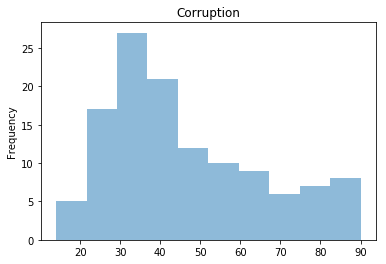

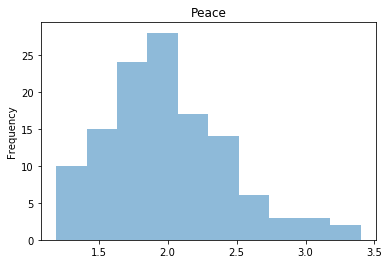

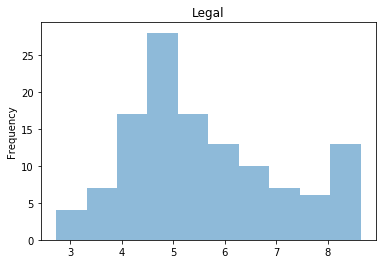

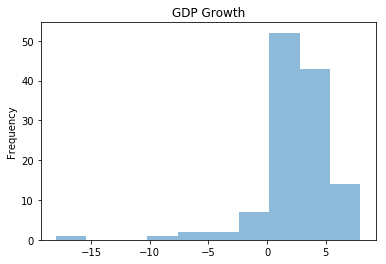

In [11]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

## K means cluster
### Pick features & normalization

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [12]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.305319 -1.194666    0.317896
1  0.467304 -0.967413    0.564392
2 -0.104348 -0.693096   -1.440899
3  0.478469 -0.990273   -0.667782
4 -1.202990  1.778450    0.030368


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

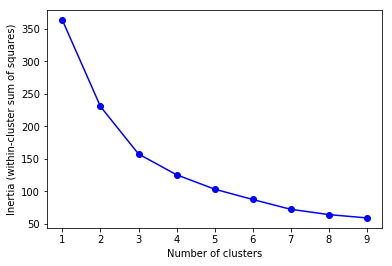

In [13]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### K means with k=3

In [14]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=2 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=2 is 157.31661757321712
cluster centers:  [[ 2.65685249e-01 -4.51167794e-01  3.63120857e-01]
 [-9.69783061e-01  1.17216616e+00  1.73192818e-03]
 [ 1.39208980e+00 -1.04170733e+00 -1.79449174e+00]]
cluster labels:  [0 0 2 0 1 1 2 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 0 0 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 2 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 2 0 0
 0 2 1 1 1 1 2 0 2 0 0]


### Visualize the result (3D plot)

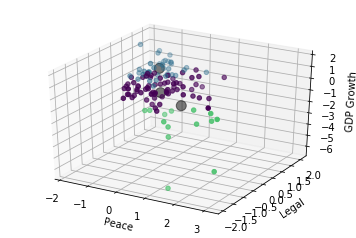

In [15]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### Visualize the result (3 2D plots)

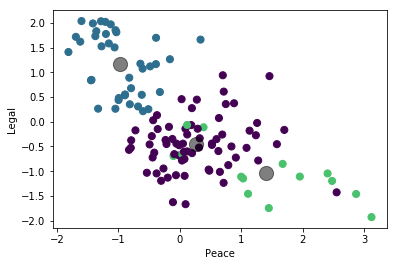

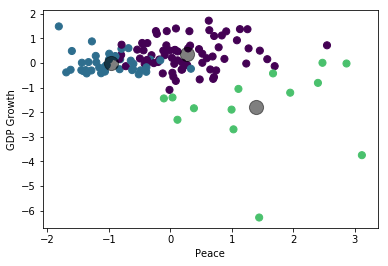

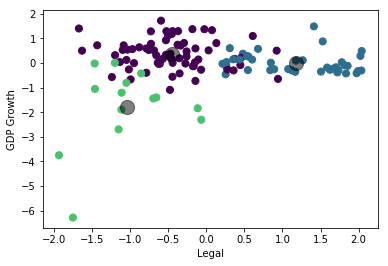

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### Visualize the result (3 2D plots)
plot country abbreviations instead of dots.

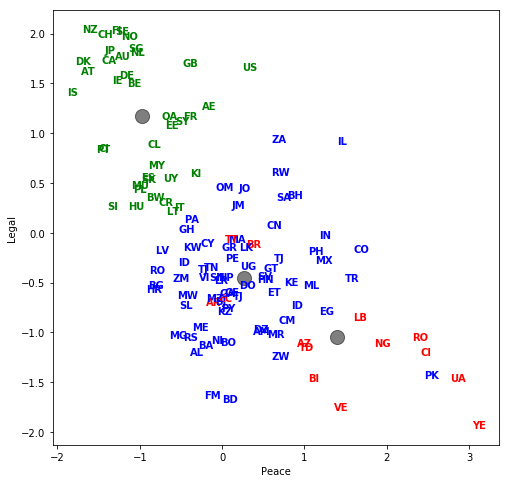

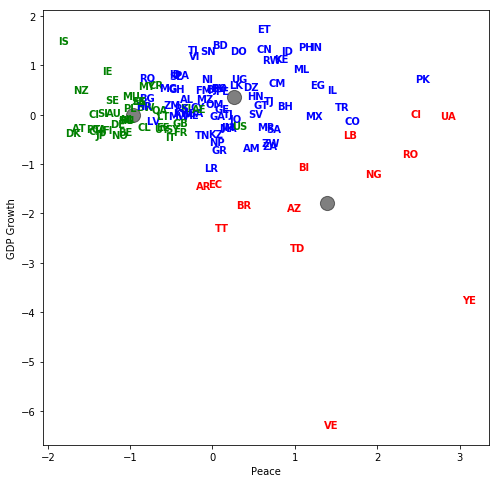

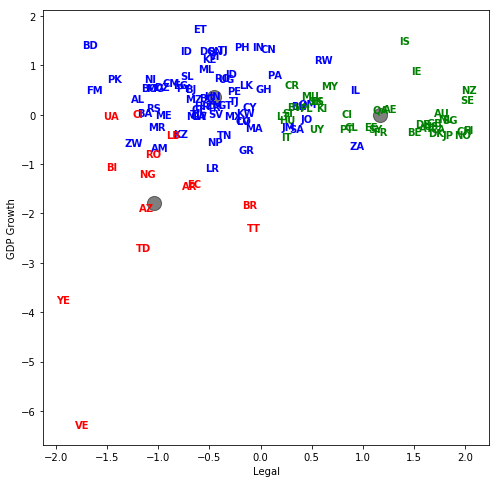

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [11]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


    Abbrev                       Country  Label
0       AL                       Albania      0
73      MZ                    Mozambique      0
72      MA                       Morocco      0
71      ME                    Montenegro      0
70      FM                       Moldova      0
69      MX                        Mexico      0
67      MR                    Mauritania      0
66      ML                          Mali      0
64      MW                        Malawi      0
63      MG                    Madagascar      0
61      LR                       Liberia      0
120     ZM                        Zambia      0
59      LV                        Latvia      0
58      KW                        Kuwait      0
56      KE                         Kenya      0
55      KZ                    Kazakhstan      0
54      JO                        Jordan      0
52      JM                       Jamaica      0
50      IL                        Israel      0
48      ID                          Iran

In [19]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3630420703158315
For n_clusters= 3 The average silhouette_score is : 0.38757393707048954
For n_clusters= 4 The average silhouette_score is : 0.3704108671833623
For n_clusters= 5 The average silhouette_score is : 0.30937227721525684
For n_clusters= 6 The average silhouette_score is : 0.30276322800901345
For n_clusters= 7 The average silhouette_score is : 0.31487382532405334
For n_clusters= 8 The average silhouette_score is : 0.3211329731549249
For n_clusters= 9 The average silhouette_score is : 0.2919968985290435
For n_clusters= 10 The average silhouette_score is : 0.30481375134975786
